In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv("/content/udemy_courses.csv")

In [3]:
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])
df["published_year"] = df["published_timestamp"].dt.year

In [4]:
# Remove Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ["price", "num_subscribers", "num_reviews", "num_lectures", "content_duration"]
df_clean = df.copy()
for col in numeric_columns:
    df_clean = remove_outliers(df_clean, col)

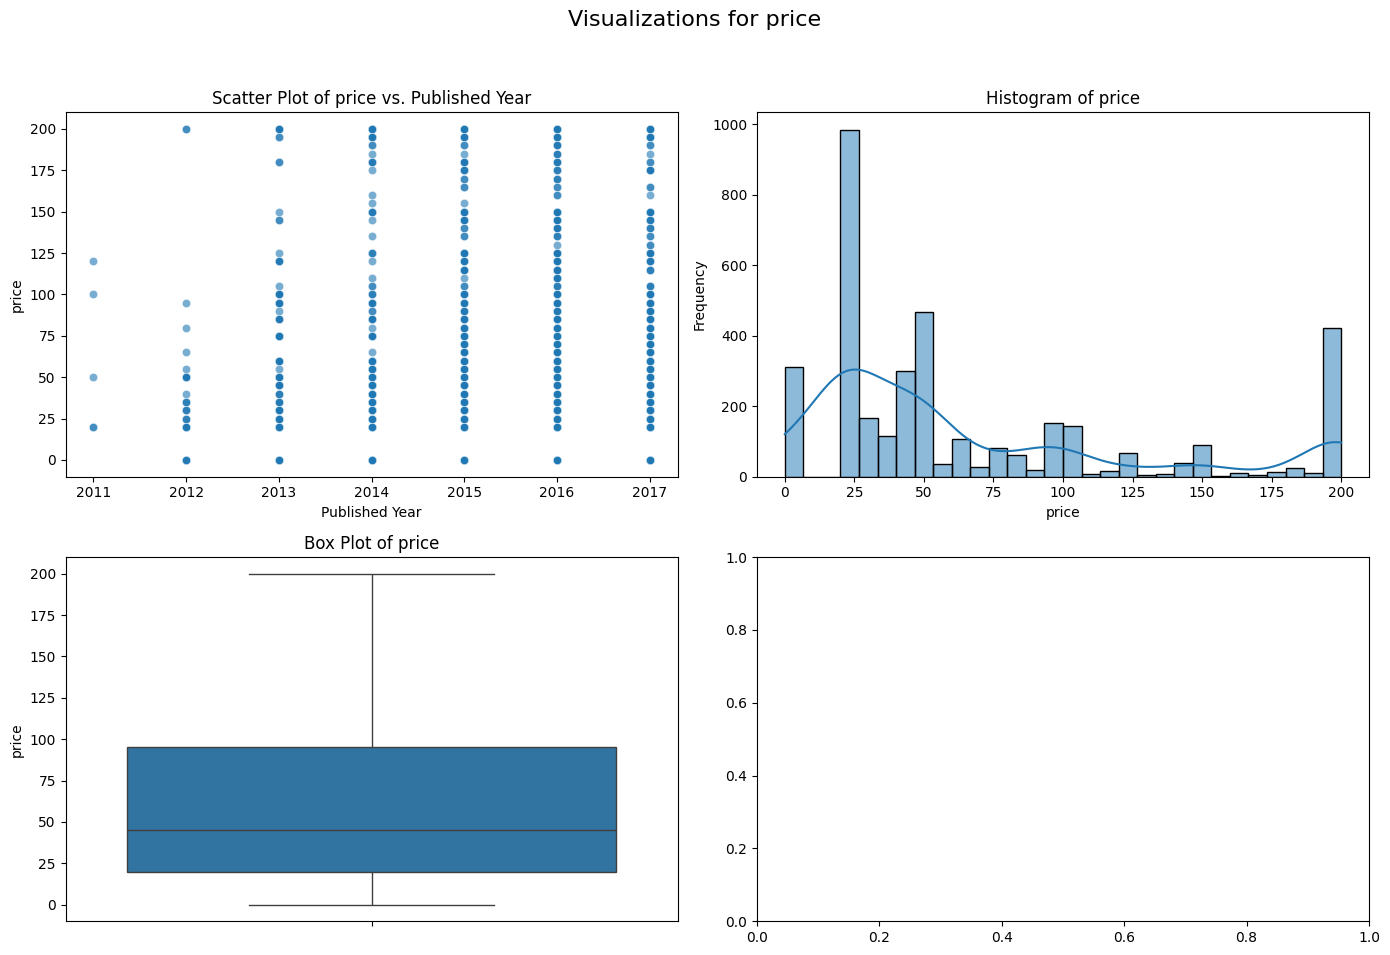

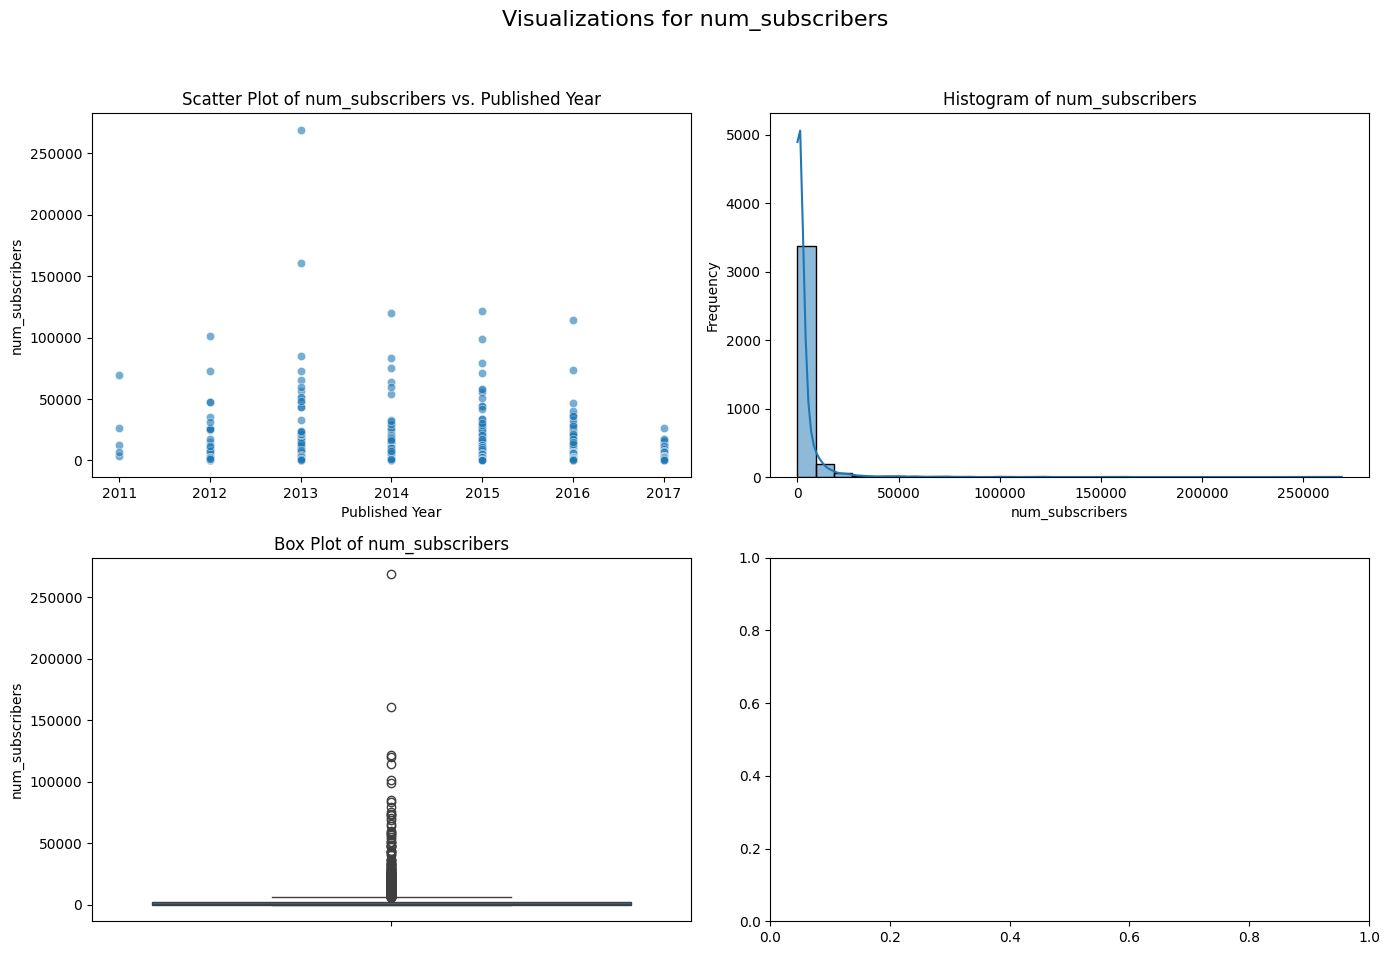

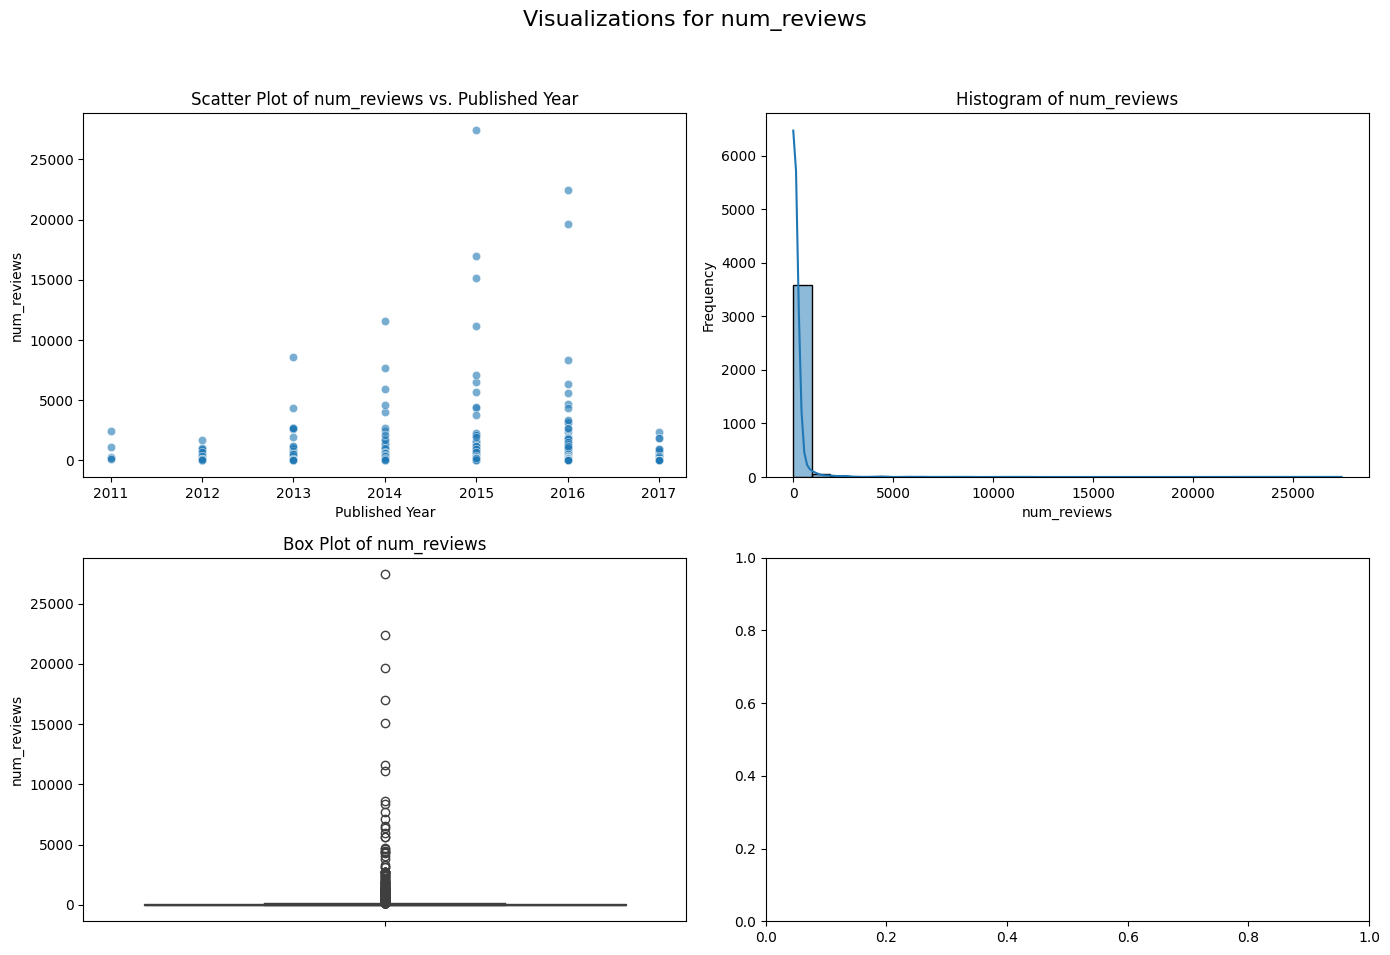

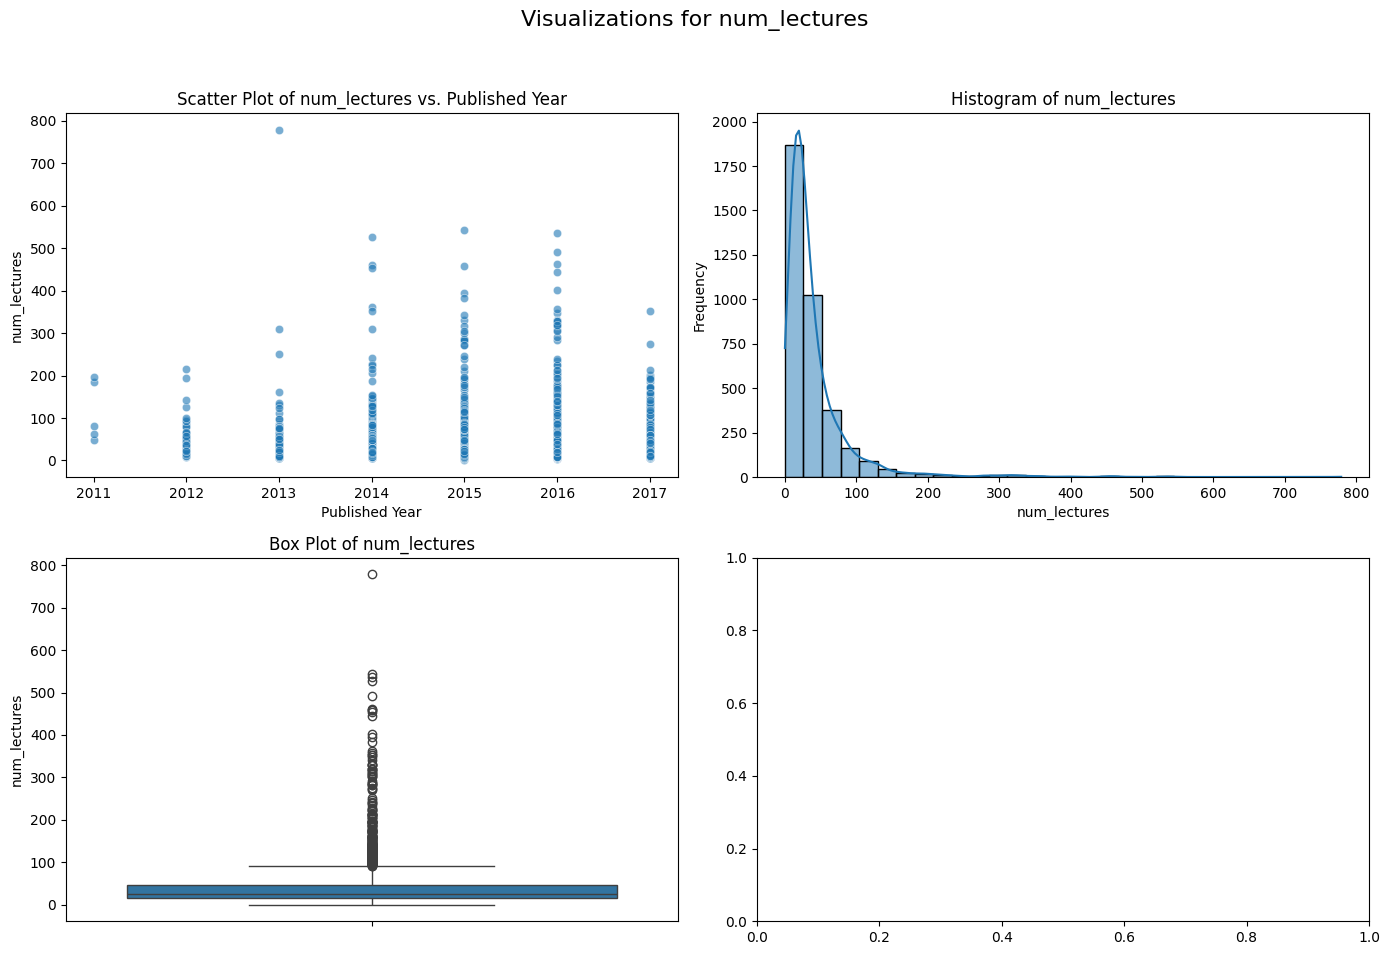

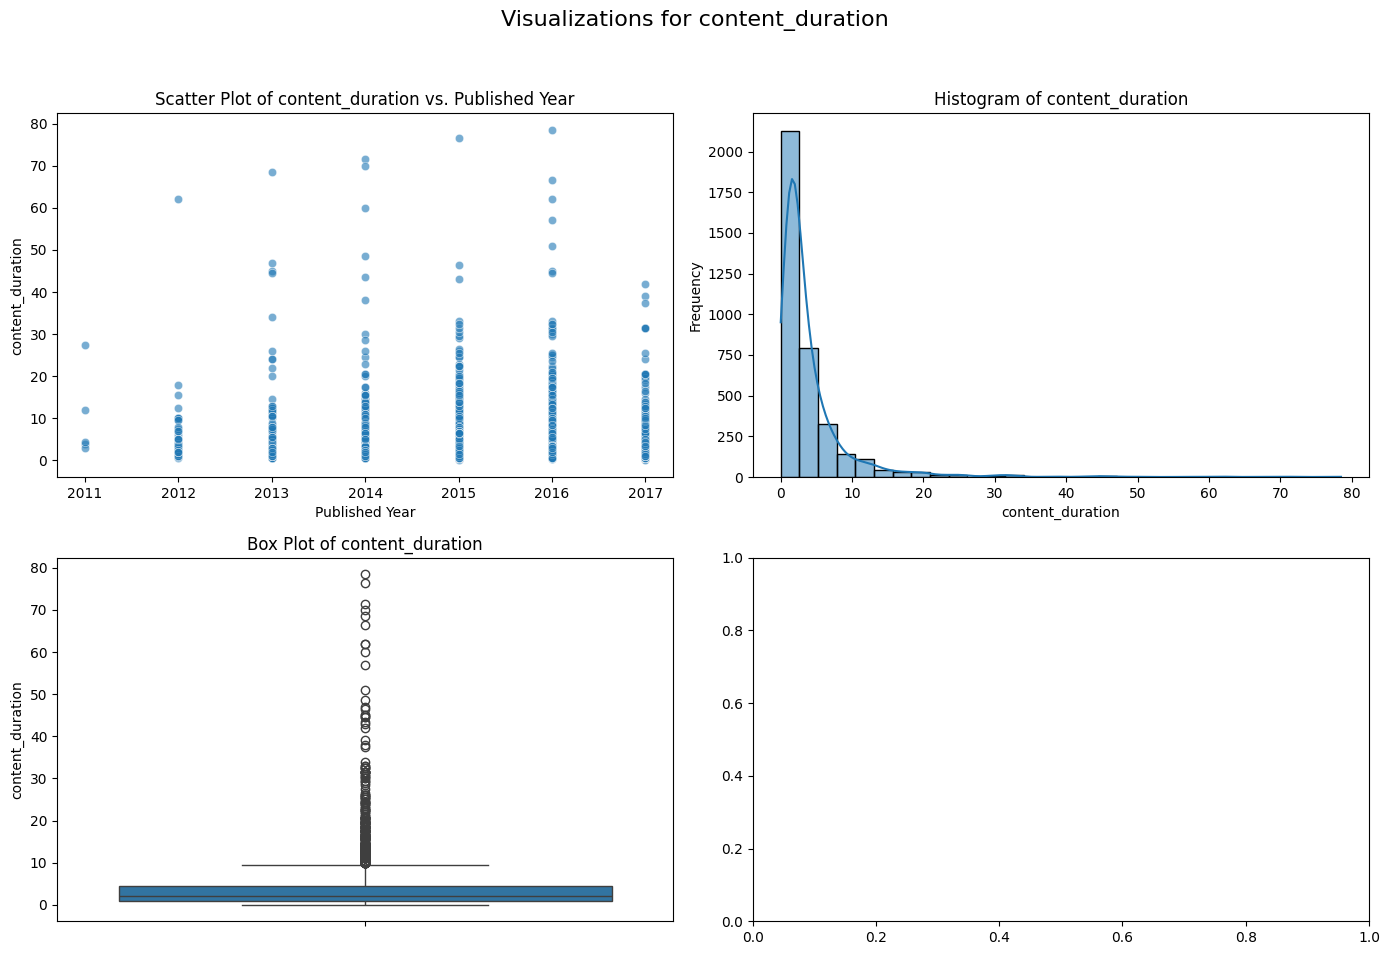

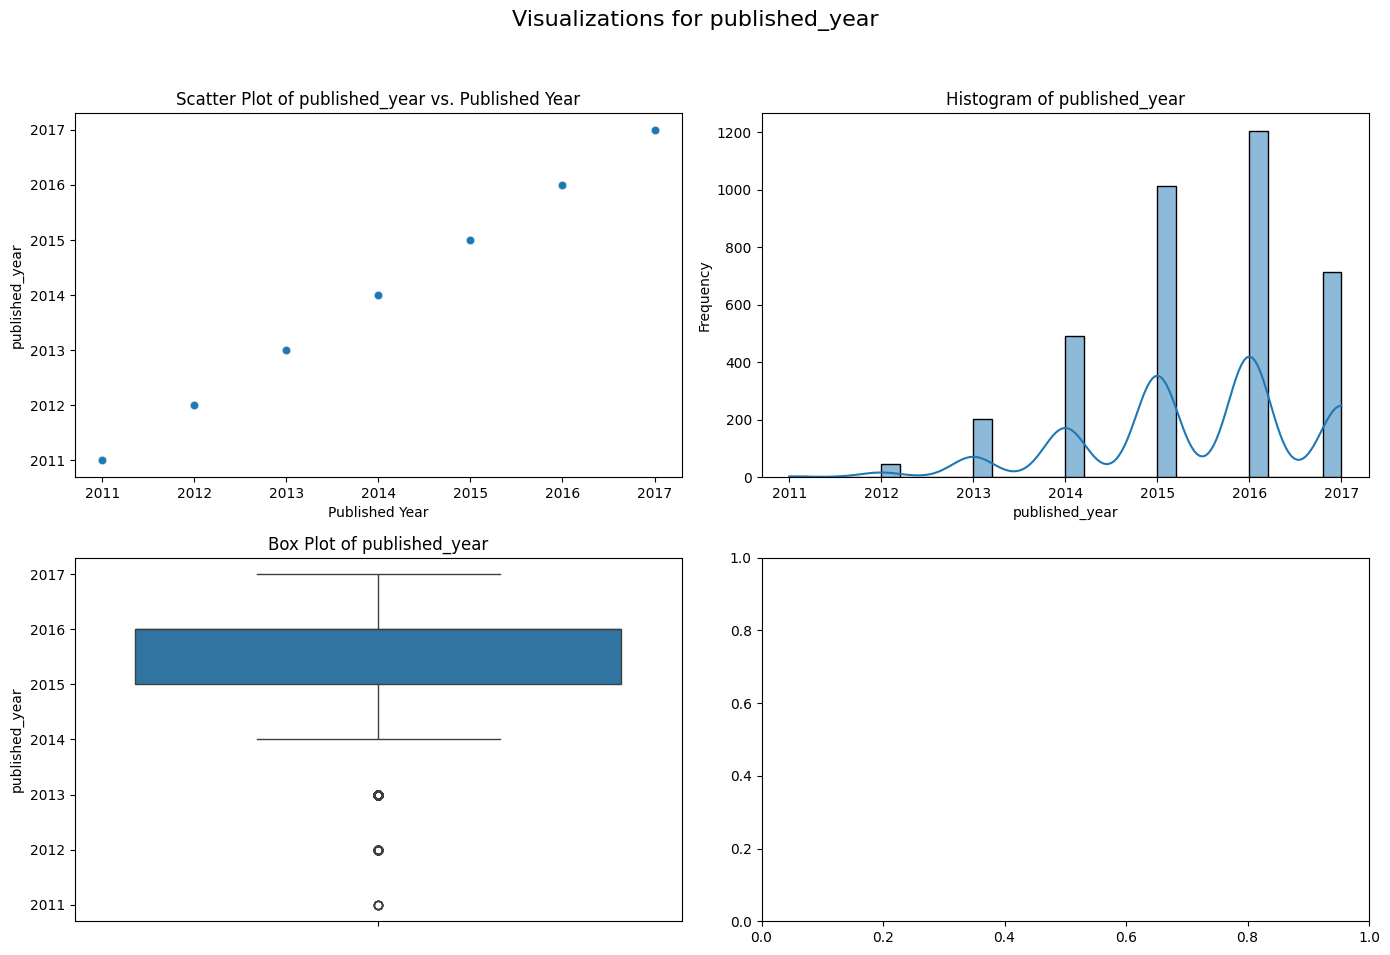

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'published_year']

# Loop through numeric columns
for col in numeric_columns:
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Visualizations for {col}', fontsize=16)

    # Scatter plot (if appropriate for the column)
    try:
        sns.scatterplot(ax=axes[0, 0], x=df['published_year'], y=df[col], alpha=0.6)
        axes[0, 0].set_title(f'Scatter Plot of {col} vs. Published Year')
        axes[0, 0].set_xlabel('Published Year')
        axes[0, 0].set_ylabel(col)
    except:  # Handle cases where scatterplot is not suitable
        axes[0, 0].set_title("Scatter plot not applicable")

    # Histogram with KDE
    sns.histplot(ax=axes[0, 1], data=df, x=col, bins=30, kde=True)
    axes[0, 1].set_title(f'Histogram of {col}')
    axes[0, 1].set_xlabel(col)
    axes[0, 1].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(ax=axes[1, 0], y=df[col])
    axes[1, 0].set_title(f'Box Plot of {col}')
    axes[1, 0].set_ylabel(col)

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


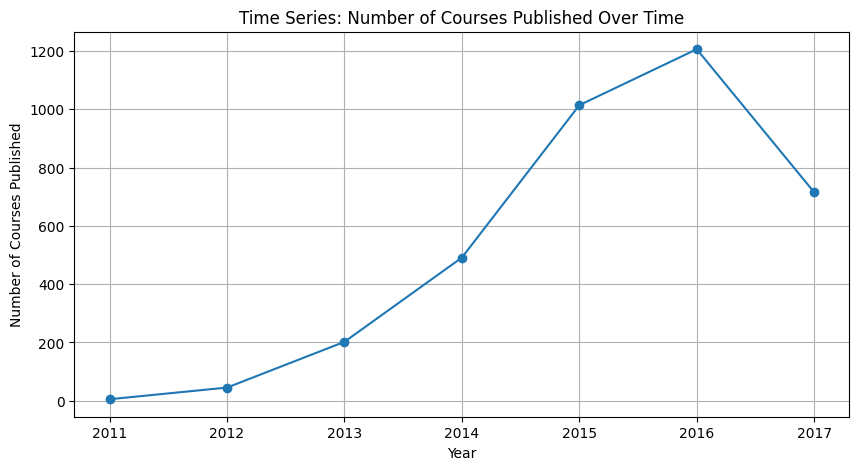

In [6]:
# Time Series Plot
plt.figure(figsize=(10, 5))
df.groupby("published_year").size().plot(marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Courses Published")
plt.title("Time Series: Number of Courses Published Over Time")
plt.grid()
plt.show()

In [7]:
# Compute Statistical Metrics
stats = {
    "Mean": df_clean[numeric_columns].mean(),
    "Median": df_clean[numeric_columns].median(),
    "Mode": df_clean[numeric_columns].mode().iloc[0],
    "Variance": df_clean[numeric_columns].var(),
    "Standard Deviation": df_clean[numeric_columns].std(),
    "Skewness": df_clean[numeric_columns].skew(),
    "Kurtosis": df_clean[numeric_columns].kurt()
}
stats_df = pd.DataFrame(stats)
print(stats_df)

                         Mean  Median    Mode      Variance  \
price               57.992701    40.0    20.0  2.996314e+03   
num_subscribers    938.414842   421.0     0.0  1.493604e+06   
num_reviews         17.768451     9.5     0.0  4.609626e+02   
num_lectures        23.660584    20.0    12.0  2.130332e+02   
content_duration     2.133746     2.0     1.0  1.832229e+00   
published_year    2015.538118  2016.0  2016.0  1.303415e+00   

                  Standard Deviation  Skewness  Kurtosis  
price                      54.738596  1.571579  1.441062  
num_subscribers          1222.130820  1.833027  3.295071  
num_reviews                21.470039  1.740931  2.685382  
num_lectures               14.595658  1.145339  1.010838  
content_duration            1.353599  1.037060  0.353581  
published_year              1.141672 -0.553883 -0.188715  


In [8]:
# Compute Statistical Metrics
stats = {
    "Mean": df_clean[numeric_columns].mean(),
    "Median": df_clean[numeric_columns].median(),
    "Mode": df_clean[numeric_columns].mode().iloc[0],
    "Variance": df_clean[numeric_columns].var(),
    "Standard Deviation": df_clean[numeric_columns].std(),
    "Skewness": df_clean[numeric_columns].skew(),
    "Kurtosis": df_clean[numeric_columns].kurt()
}
stats_df = pd.DataFrame(stats)

In [9]:
# Encoding categorical target variable# Encoding categorical target variable
df_clean["level"] = LabelEncoder().fit_transform(df_clean["level"])
df_clean["level"] = LabelEncoder().fit_transform(df_clean["level"])

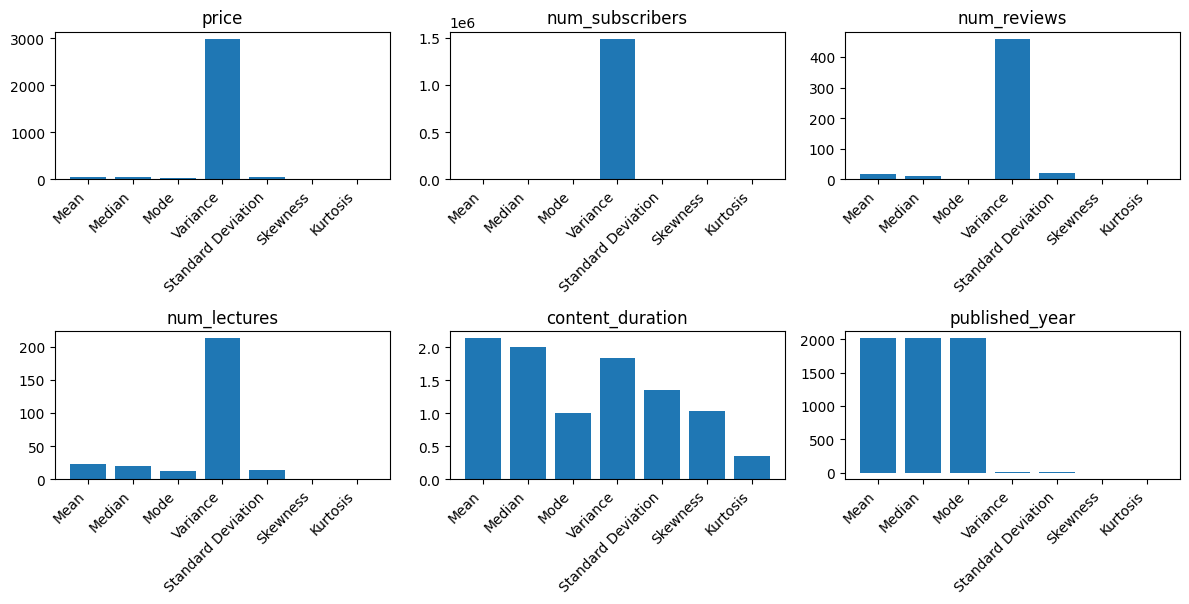

In [10]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, metric in enumerate(stats_df.index):
    plt.subplot(3, 3, i + 1)
    plt.bar(stats_df.columns, stats_df.loc[metric])
    plt.title(metric)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust subplot params for a tight layout


plt.show()


In [11]:
# Selecting Features & Target
X = df_clean[["price", "num_subscribers", "num_reviews", "num_lectures", "content_duration"]]
y = df_clean["level"]

In [12]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Training Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.51      0.98      0.67       254
           1       0.38      0.02      0.03       180
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        52

    accuracy                           0.51       494
   macro avg       0.22      0.25      0.18       494
weighted avg       0.40      0.51      0.36       494

Decision Tree Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       254
           1       0.40      0.36      0.38       180
           2       0.08      0.12      0.10         8
           3       0.21      0.25      0.23        52

    accuracy                           0.44       494
   macro avg       0.31      0.32      0.31       494
weighted avg       0.45      0.44      0.44       494



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.55      0.75      0.64       254
           1       0.49      0.36      0.41       180
           2       0.00      0.00      0.00         8
           3       0.40      0.12      0.18        52

    accuracy                           0.53       494
   macro avg       0.36      0.31      0.31       494
weighted avg       0.50      0.53      0.50       494

Support Vector Machine (SVM) Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.51      0.93      0.66       254
           1       0.40      0.08      0.13       180
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        52

    accuracy                           0.51       494
   macro avg       0.23      0.25      0.20       494
weighted avg       0.41      0.51      0.39       494

K-Nearest Neighbors (KNN) Accuracy: 0.48
              pr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [15]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy:.2f}")


Logistic Regression Accuracy: 0.51
Decision Tree Accuracy: 0.47
Random Forest Accuracy: 0.52
Support Vector Machine (SVM) Accuracy: 0.51
K-Nearest Neighbors (KNN) Accuracy: 0.48
Naive Bayes Accuracy: 0.52

Best Model: Random Forest with Accuracy: 0.52


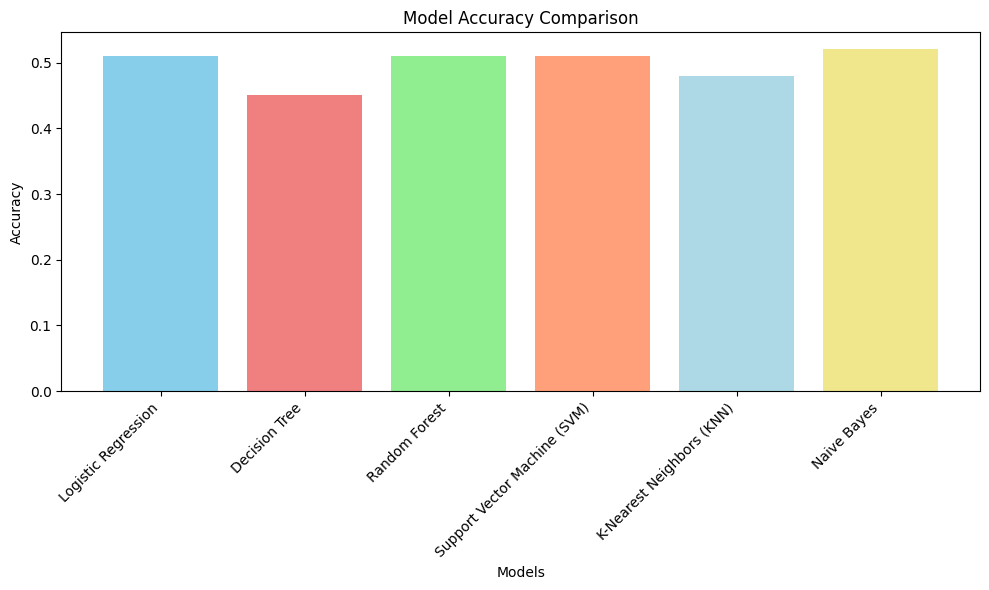

In [16]:


import matplotlib.pyplot as plt

models = {
    "Logistic Regression": 0.51,
    "Decision Tree": 0.45,
    "Random Forest": 0.51,
    "Support Vector Machine (SVM)": 0.51,
    "K-Nearest Neighbors (KNN)": 0.48,
    "Naive Bayes": 0.52
}

names = list(models.keys())
values = list(models.values())

plt.figure(figsize=(10, 6))
plt.bar(names, values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue', 'khaki'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import zscore

# Assuming 'df_clean' is your DataFrame and 'numeric_columns' contains the names of the numeric columns
numeric_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'published_year']
for col in numeric_columns:
    df_clean[f'{col}_zscore'] = zscore(df_clean[col])

print(df_clean.head())


   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   
8     476268  Options Trading 3 : Advanced Stock Profit and ...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   
8  https://www.udemy.com/day-trading-stock-option...     True    195   

   num_subscribers  num_reviews  num_lectures  level  content_duration  \
0             2147           23            51      0               1.5   
2             21

In [19]:
# Assuming 'df_clean' is your DataFrame and 'numeric_columns' contains the names of the numeric columns
numeric_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'published_year']
for col in numeric_columns:
    # Perform Shapiro-Wilk test
    from scipy.stats import shapiro
    stat, p = shapiro(df_clean[col])
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p={p:.3f}')

    # Interpret the results
    alpha = 0.05
    if p > alpha:
        print(f'{col}: Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{col}: Sample does not look Gaussian (reject H0)')


Shapiro-Wilk Test for price: Statistics=0.759, p=0.000
price: Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test for num_subscribers: Statistics=0.763, p=0.000
num_subscribers: Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test for num_reviews: Statistics=0.779, p=0.000
num_reviews: Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test for num_lectures: Statistics=0.905, p=0.000
num_lectures: Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test for content_duration: Statistics=0.888, p=0.000
content_duration: Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test for published_year: Statistics=0.897, p=0.000
published_year: Sample does not look Gaussian (reject H0)


In [20]:
from scipy.stats import ttest_ind

# Assuming 'df_clean' is your DataFrame and 'numeric_columns' contains the names of the numeric columns
numeric_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'published_year']

# Split the data into two groups (replace 'group1_condition' and 'group2_condition' with your actual conditions)
group1 = df_clean[df_clean['level'] == 0]  # Example: level 0
group2 = df_clean[df_clean['level'] == 1]  # Example: level 1

# Perform t-tests for each numeric column
for col in numeric_columns:
    t_statistic, p_value = ttest_ind(group1[col], group2[col], nan_policy='omit')
    print(f"T-test for {col}:")
    print(f"  T-statistic: {t_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print(f"  There is a statistically significant difference between groups for {col}")
    else:
        print(f"  There is no statistically significant difference between groups for {col}")
    print("---")


T-test for price:
  T-statistic: 4.8921
  P-value: 0.0000
  There is a statistically significant difference between groups for price
---
T-test for num_subscribers:
  T-statistic: -0.5593
  P-value: 0.5760
  There is no statistically significant difference between groups for num_subscribers
---
T-test for num_reviews:
  T-statistic: 1.0732
  P-value: 0.2833
  There is no statistically significant difference between groups for num_reviews
---
T-test for num_lectures:
  T-statistic: -0.2896
  P-value: 0.7721
  There is no statistically significant difference between groups for num_lectures
---
T-test for content_duration:
  T-statistic: 0.5539
  P-value: 0.5797
  There is no statistically significant difference between groups for content_duration
---
T-test for published_year:
  T-statistic: -3.9043
  P-value: 0.0001
  There is a statistically significant difference between groups for published_year
---
